# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## Preprocessing of Project Subject Categories

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of Project Subject Subcategories

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

# FEATURES 

### categorical data : school_state, clean_categories , clean_subcategories, project_grade_category, teacher_prefix
 
### numerical data : quantity, teacher_number_of_previously_posted_projects, price

### New Features :

#### sentiment score's of each of the essay : numerical data
#### number of words in the title : numerical data
#### number of words in the combine essays : numerical data

In [10]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
new_title = []
for i in tqdm(project_data['project_title']):
    j = decontracted(i)
    new_title.append(j)

100%|██████████| 109248/109248 [00:02<00:00, 44791.21it/s]


In [12]:
title_word_count = []
#for i in project_data['project_title']:
for i in tqdm(new_title):
    j = len(i.split())
    title_word_count.append(j)
    #print(j)
project_data['title_word_count'] = title_word_count

100%|██████████| 109248/109248 [00:00<00:00, 464155.41it/s]


In [13]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  
0  My students are English learners that are work...                 7  
1  Our students arrive to our school eager to lea...                 5

In [14]:
new_essay = []
for i in tqdm(project_data['essay']):
    j = decontracted(i)
    new_essay.append(j)

100%|██████████| 109248/109248 [00:04<00:00, 24313.18it/s]


In [15]:
essay_word_count = []
for i in tqdm(new_essay):
    j = len(i.split())
    essay_word_count.append(j)
    #print(j)
project_data['essay_word_count'] = essay_word_count

100%|██████████| 109248/109248 [00:02<00:00, 39511.08it/s]


In [16]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

   essay_word_count  
0               275  
1               221

## Computing sentimental scores from essay reviews :

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
sia = SentimentIntensityAnalyzer()
#There is NEGITIVE and POSITIVE and NEUTRAL and COMPUND SCORES
#http://www.nltk.org/howto/sentiment.html
    
negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(project_data['essay']):
    j = sia.polarity_scores(i)['neg']
    k = sia.polarity_scores(i)['neu']
    l = sia.polarity_scores(i)['pos']
    m = sia.polarity_scores(i)['compound']
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    compound.append(m)

100%|██████████| 109248/109248 [38:09<00:00, 47.71it/s]


In [19]:
project_data['negative'] = negitive
project_data['positive'] = positive
project_data['neutral'] = neutral
project_data['compound'] = compound

In [20]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ... project_is_approved  \
0  \"The limits of your language are the limits o...  ...                   0   
1  The projector we need for our school is very c...  ...                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  title_word_count  \
0  My students are English learners that are work...                 7   
1  Our students arrive to our school eager to lea...                 5   

  essay_word_count negative positive  neutral  compound  
0              275    0.008    0.911    0.081    0.9611  
1              221    0.037    0.851    0.112    0.9267  

[2 rows x 24 columns]

In [21]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [22]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [23]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [24]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Preprocessing Essays 

In [25]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:05<00:00, 873.28it/s]


In [26]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

## Preprocessing Of Project Title

In [27]:
# train_preprocessed_title
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:06<00:00, 17842.13it/s]


In [28]:
preprocessed_titles[10]

'reading changes lives'

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negative', 'positive', 'neutral', 'compound'],
      dtype='object')

In [30]:
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_title'], axis=1, inplace=True)

In [31]:
project_data['clean_essay'] = preprocessed_essays
project_data['clean_project_title'] = preprocessed_titles
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   

    clean_categories clean_subcategories  title_word_count  essay_word_count  \
0  Literacy_Language        ESL Literacy                 7               275   

  negative positive  neutral  compound  \
0    0.008    0.911    0.081    0.9611   

                                         clean_essay  \
0  my students english learners working english s...   

                         clean_project_title  
0  educational support english learners home  

[1 rows x 24 columns]

In [32]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [33]:
project_data = project_data.fillna(project_data['teacher_prefix'].value_counts().index[0])

## Splitting The Data Set :

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(project_data,project_data["project_is_approved"],test_size = 0.33, stratify = project_data["project_is_approved"],random_state = 42)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train,stratify=y_train,test_size=0.33)

In [35]:
print(x_test.columns)
print(x_cv.columns)
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count',
       'essay_word_count', 'negative', 'positive', 'neutral', 'compound',
       'clean_essay', 'clean_project_title'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count',
       'essay_word_count', 'negative', 'positive',

## Using Response Coding (Probality Values)

In [36]:
project_data['school_state'].unique()

array(['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY',
       'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV',
       'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ',
       'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD',
       'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT'], dtype=object)

In [37]:
def Responsetable(table, col) :
    cat = table[col].unique()
    
    freq_Pos = []
    for i in cat : 
        freq_Pos.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 1)]))
        
        
    freq_Neg = []
    for i in cat : 
        freq_Neg.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 0)]))
        
    
    encoded_Pos = []
    for i in range(len(cat)) :
        encoded_Pos.append(freq_Pos[i]/(freq_Pos[i] + freq_Neg[i]))
    
    encoded_Neg = []
    encoded_Neg[:] = [1 - x for x in encoded_Pos]
        
    encoded_Pos_val = dict(zip(cat, encoded_Pos)) 
    encoded_Neg_val = dict(zip(cat, encoded_Neg)) 
    
    return encoded_Pos_val, encoded_Neg_val

In [38]:
pos_cleancat, neg_cleancat = Responsetable(x_train,'clean_categories')
pos_cleansubcat, neg_cleansubcat = Responsetable(x_train,'clean_subcategories')
pos_schoolstate, neg_schoolstate = Responsetable(x_train, 'school_state')
pos_teacherprefix, neg_teacherprefix = Responsetable(x_train, 'teacher_prefix')
pos_projgradecat, neg_projgradecat = Responsetable(x_train, 'project_grade_category')

In [39]:
type(pos_cleancat) 
type(neg_cleancat)
type(pos_cleansubcat) 
type(neg_cleansubcat) 
type(pos_schoolstate) 
type(neg_schoolstate) 
type(pos_teacherprefix) 
type(neg_teacherprefix) 
type(pos_projgradecat)
type(neg_projgradecat) 

dict

In [40]:
pos_cleancat

{'AppliedLearning Health_Sports': 0.8297101449275363,
 'Literacy_Language': 0.865115842791483,
 'Literacy_Language Math_Science': 0.8682218445852,
 'Math_Science': 0.814227695532556,
 'Math_Science Music_Arts': 0.8319672131147541,
 'Health_Sports': 0.8471797114123306,
 'Health_Sports SpecialNeeds': 0.8794212218649518,
 'AppliedLearning Math_Science': 0.796078431372549,
 'AppliedLearning Literacy_Language': 0.8594704684317719,
 'AppliedLearning': 0.8210093896713615,
 'Math_Science Health_Sports': 0.7789473684210526,
 'SpecialNeeds': 0.8244897959183674,
 'Math_Science AppliedLearning': 0.8370786516853933,
 'Literacy_Language SpecialNeeds': 0.8566610455311973,
 'History_Civics Literacy_Language': 0.89375,
 'Music_Arts': 0.8535637149028078,
 'Math_Science SpecialNeeds': 0.8454882571075402,
 'Literacy_Language Music_Arts': 0.8416988416988417,
 'Math_Science Literacy_Language': 0.8480531813865148,
 'AppliedLearning SpecialNeeds': 0.839258114374034,
 'History_Civics': 0.8483080513418904,
 'He

In [41]:
x_train['clean_cat_pos'] = x_train['clean_categories'].map(pos_cleancat)
x_train['clean_cat_neg'] = x_train['clean_categories'].map(neg_cleancat)
x_train['clean_subcat_pos'] = x_train['clean_subcategories'].map(pos_cleansubcat)
x_train['clean_subcat_neg'] = x_train['clean_subcategories'].map(neg_cleansubcat)
x_train['school_state_pos'] = x_train['school_state'].map(pos_schoolstate)
x_train['school_state_neg'] = x_train['school_state'].map(neg_schoolstate)
x_train['teacher_prefix_pos'] = x_train['teacher_prefix'].map(pos_teacherprefix)
x_train['teacher_prefix_neg'] = x_train['teacher_prefix'].map(neg_teacherprefix)
x_train['proj_grade_cat_pos'] = x_train['project_grade_category'].map(pos_projgradecat)
x_train['proj_grade_cat_neg'] = x_train['project_grade_category'].map(neg_projgradecat)

In [42]:
x_cv['clean_cat_pos'] = x_cv['clean_categories'].map(pos_cleancat)
x_cv['clean_cat_neg'] = x_cv['clean_categories'].map(neg_cleancat)
x_cv['clean_subcat_pos'] = x_cv['clean_subcategories'].map(pos_cleansubcat)
x_cv['clean_subcat_neg'] = x_cv['clean_subcategories'].map(neg_cleansubcat)
x_cv['school_state_pos'] = x_cv['school_state'].map(pos_schoolstate)
x_cv['school_state_neg'] = x_cv['school_state'].map(neg_schoolstate)
x_cv['teacher_prefix_pos'] = x_cv['teacher_prefix'].map(pos_teacherprefix)
x_cv['teacher_prefix_neg'] = x_cv['teacher_prefix'].map(neg_teacherprefix)
x_cv['proj_grade_cat_pos'] = x_cv['project_grade_category'].map(pos_projgradecat)
x_cv['proj_grade_cat_neg'] = x_cv['project_grade_category'].map(neg_projgradecat)

In [43]:
x_test['clean_cat_pos'] = x_test['clean_categories'].map(pos_cleancat)
x_test['clean_cat_neg'] = x_test['clean_categories'].map(neg_cleancat)
x_test['clean_subcat_pos'] = x_test['clean_subcategories'].map(pos_cleansubcat)
x_test['clean_subcat_neg'] = x_test['clean_subcategories'].map(neg_cleansubcat)
x_test['school_state_pos'] = x_test['school_state'].map(pos_schoolstate)
x_test['school_state_neg'] = x_test['school_state'].map(neg_schoolstate)
x_test['teacher_prefix_pos'] = x_test['teacher_prefix'].map(pos_teacherprefix)
x_test['teacher_prefix_neg'] = x_test['teacher_prefix'].map(neg_teacherprefix)
x_test['proj_grade_cat_pos'] = x_test['project_grade_category'].map(pos_projgradecat)
x_test['proj_grade_cat_neg'] = x_test['project_grade_category'].map(neg_projgradecat)

In [44]:
x_cv.isnull().sum()

Unnamed: 0                                       0
id                                               0
teacher_id                                       0
teacher_prefix                                   0
school_state                                     0
project_submitted_datetime                       0
project_grade_category                           0
project_essay_1                                  0
project_essay_2                                  0
project_essay_3                                  0
project_essay_4                                  0
project_resource_summary                         0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
clean_categories                                 0
clean_subcategories                              0
title_word_count                                 0
essay_word_count                                 0
negative                                         0
positive                       

In [45]:
x_cv["clean_subcat_pos"].fillna(value=0.5,inplace = True)
x_cv["clean_subcat_neg"].fillna(value=0.5,inplace = True)

In [46]:
x_test.isnull().sum()

Unnamed: 0                                       0
id                                               0
teacher_id                                       0
teacher_prefix                                   0
school_state                                     0
project_submitted_datetime                       0
project_grade_category                           0
project_essay_1                                  0
project_essay_2                                  0
project_essay_3                                  0
project_essay_4                                  0
project_resource_summary                         0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
clean_categories                                 0
clean_subcategories                              0
title_word_count                                 0
essay_word_count                                 0
negative                                         0
positive                       

In [47]:
x_test["clean_subcat_pos"].fillna(value=0.5,inplace = True)
x_test["clean_subcat_neg"].fillna(value=0.5,inplace = True)

## Bag Of Words :

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['clean_essay'])
train_text_bow = vectorizer.fit_transform(x_train['clean_essay'])
cv_text_bow = vectorizer.transform(x_cv['clean_essay'])
test_text_bow = vectorizer.transform(x_test['clean_essay'])
print("Shape of matrix after one hot encodig ",train_text_bow.shape, y_train.shape)
print("Shape of matrix after one hot encodig ",test_text_bow.shape, y_test.shape)
print("Shape of matrix after one hot encodig ",cv_text_bow.shape, y_cv.shape)

Shape of matrix after one hot encodig  (49041, 12178) (49041,)
Shape of matrix after one hot encodig  (36052, 12178) (36052,)
Shape of matrix after one hot encodig  (24155, 12178) (24155,)


## Bag Of Words(Project_Title)

In [49]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['clean_project_title'])
train_title_bow = vectorizer.transform(x_train['clean_project_title'])
cv_title_bow = vectorizer.transform(x_cv['clean_project_title'])
test_title_bow = vectorizer.transform(x_test['clean_project_title'])
print("Shape of matrix ",train_title_bow.shape)
print("Shape of matrix ",cv_title_bow.shape)
print("Shape of matrix ",test_title_bow.shape)

Shape of matrix  (49041, 2106)
Shape of matrix  (24155, 2106)
Shape of matrix  (36052, 2106)


## TF-IDF(Project_Essay)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['clean_essay'])
train_text_tfidf = vectorizer.transform(x_train['clean_essay'])
cv_text_tfidf = vectorizer.transform(x_cv['clean_essay'])
test_text_tfidf = vectorizer.transform(x_test['clean_essay'])
print("Shape of matrix ",train_text_tfidf.shape)
print("Shape of matrix ",cv_text_tfidf.shape)
print("Shape of matrix ",test_text_tfidf.shape)

Shape of matrix  (49041, 12178)
Shape of matrix  (24155, 12178)
Shape of matrix  (36052, 12178)


## TF-IDF(Project_Title)

In [51]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['clean_project_title'])
train_title_tfidf = vectorizer.transform(x_train['clean_project_title'])
cv_title_tfidf = vectorizer.transform(x_cv['clean_project_title'])
test_title_tfidf = vectorizer.transform(x_test['clean_project_title'])
print("Shape of matrix ",test_title_tfidf.shape)
print("Shape of matrix ",cv_title_tfidf.shape)
print("Shape of matrix ",train_title_tfidf.shape)

Shape of matrix  (36052, 2106)
Shape of matrix  (24155, 2106)
Shape of matrix  (49041, 2106)


## Avg W2V(Project Essay)

In [52]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))
for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)

Loading Glove Model


1917495it [08:33, 3733.18it/s]


Done. 1917495  words loaded!
all the words in the coupus 17014413
the unique words in the coupus 58968
The number of words that are present in both glove vectors and our coupus 51503 ( 87.341 %)
word 2 vec length 51503


In [53]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [54]:
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:31<00:00, 1572.38it/s]


49041
300


In [55]:
# compute average word2vec for each review.
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:15<00:00, 1580.92it/s]


24155
300


In [56]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:22<00:00, 1578.67it/s]


36052
300


## Avg W2V(Project_Title)

In [57]:
# average Word2Vec
# compute average word2vec for each review.
train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_title_avg_w2v_vectors.append(vector)

print(len(train_title_avg_w2v_vectors))
print(len(train_title_avg_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:01<00:00, 29458.19it/s]


49041
300


In [58]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_title_avg_w2v_vectors.append(vector)

print(len(cv_title_avg_w2v_vectors))
print(len(cv_title_avg_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:00<00:00, 33199.01it/s]


24155
300


In [59]:
# average Word2Vec
# compute average word2vec for each review.
test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_title_avg_w2v_vectors.append(vector)

print(len(test_title_avg_w2v_vectors))
print(len(test_title_avg_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:01<00:00, 33366.83it/s]


36052
300


## TF-IDF weighted Avg W2V 

In [60]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
# average Word2Vec
# compute average word2vec for each review.
train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_essay_tfidf_w2v_vectors.append(vector)

print(len(train_essay_tfidf_w2v_vectors))
print(len(train_essay_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [03:44<00:00, 218.53it/s]


49041
300


In [62]:
# average Word2Vec
# compute average word2vec for each review.
cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_essay_tfidf_w2v_vectors.append(vector)

print(len(cv_essay_tfidf_w2v_vectors))
print(len(cv_essay_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [01:48<00:00, 221.94it/s]


24155
300


In [63]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_essay_tfidf_w2v_vectors.append(vector)

print(len(test_essay_tfidf_w2v_vectors))
print(len(test_essay_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [02:45<00:00, 218.15it/s]


36052
300


## Project Title(TF-IDF weighted Average Word2Vec)

In [64]:
# average Word2Vec
# compute average word2vec for each review.
train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [00:03<00:00, 15615.72it/s]


49041
300


In [65]:
# average Word2Vec
# compute average word2vec for each review.
cv_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_title_tfidf_w2v_vectors.append(vector)

print(len(cv_title_tfidf_w2v_vectors))
print(len(cv_title_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:01<00:00, 16408.41it/s]


24155
300


In [66]:
# average Word2Vec
# compute average word2vec for each review.
test_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:02<00:00, 15444.12it/s]


36052
300


In [67]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head())
#print(project_data.columns)
print(x_train.columns)

        id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count',
       'essay_word_count', 'negative', 'positive', 'neutral', 'compound',
       'clean_essay', 'clean_project_title', 'clean_cat_pos', 'clean_cat_neg',
       'clean_subcat_pos', 'clean_subcat_neg', 'school_state_pos',
       'school_state_neg', 'teacher_prefix_pos', 'teacher_prefix_neg',
       'proj_grade_cat_pos', 'proj_grade_cat_neg'],
      dtype='object')


In [68]:
x_train = pd.merge(x_train, price_data, on = "id", how = "left")
x_cv = pd.merge(x_cv, price_data, on = "id", how = "left")
x_test = pd.merge(x_test, price_data, on = "id", how = "left")

In [69]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count',
       'essay_word_count', 'negative', 'positive', 'neutral', 'compound',
       'clean_essay', 'clean_project_title', 'clean_cat_pos', 'clean_cat_neg',
       'clean_subcat_pos', 'clean_subcat_neg', 'school_state_pos',
       'school_state_neg', 'teacher_prefix_pos', 'teacher_prefix_neg',
       'proj_grade_cat_pos', 'proj_grade_cat_neg', 'price', 'quantity'],
      dtype='object')


### Numerical Features Not to be scaled for RandomForest : 

In [70]:
price_train= x_train['price'].values.reshape(-1, 1)
price_test= x_test['price'].values.reshape(-1, 1)
price_cv = x_cv['price'].values.reshape(-1,1)
quantity_train = x_train['quantity'].values.reshape(-1,1)
quantity_test = x_test['quantity'].values.reshape(-1,1)
quantity_cv = x_cv['quantity'].values.reshape(-1,1)
prev_projects_train = x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
prev_projects_test = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
prev_projects_cv = x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

In [71]:
essay_neg_test=x_test['negative'].values.reshape(-1,1)
essay_pos_test=x_test['positive'].values.reshape(-1,1)
essay_neu_test=x_test['neutral'].values.reshape(-1,1)
essay_com_test=x_test['compound'].values.reshape(-1,1)
essay_neg_cv=x_cv['negative'].values.reshape(-1,1)
essay_pos_cv=x_cv['positive'].values.reshape(-1,1)
essay_neu_cv=x_cv['neutral'].values.reshape(-1,1)
essay_com_cv=x_cv['compound'].values.reshape(-1,1)
essay_neg_train=x_train['negative'].values.reshape(-1,1)
essay_pos_train=x_train['positive'].values.reshape(-1,1)
essay_neu_train=x_train['neutral'].values.reshape(-1,1)
essay_com_train=x_train['compound'].values.reshape(-1,1)

In [72]:
cattrain_pos=x_train['clean_cat_pos'].values.reshape(-1,1)
cattrain_neg=x_train['clean_cat_neg'].values.reshape(-1,1)
subcattrain_pos=x_train['clean_subcat_pos'].values.reshape(-1,1)
subcattrain_neg=x_train['clean_subcat_neg'].values.reshape(-1,1)
ss_postrain=x_train['school_state_pos'].values.reshape(-1,1)
ss_negtrain=x_train['school_state_neg'].values.reshape(-1,1)
teachertrain_pos=x_train['teacher_prefix_pos'].values.reshape(-1,1)
teachertrain_neg=x_train['teacher_prefix_neg'].values.reshape(-1,1)
projgradetrain_pos=x_train['proj_grade_cat_pos'].values.reshape(-1,1)
projgradetrain_neg=x_train['proj_grade_cat_neg'].values.reshape(-1,1)
catcv_pos=x_cv['clean_cat_pos'].values.reshape(-1,1)
catcv_neg=x_cv['clean_cat_neg'].values.reshape(-1,1)
subcatcv_pos=x_cv['clean_subcat_pos'].values.reshape(-1,1)
subcatcv_neg=x_cv['clean_subcat_neg'].values.reshape(-1,1)
ss_poscv=x_cv['school_state_pos'].values.reshape(-1,1)
ss_negcv=x_cv['school_state_neg'].values.reshape(-1,1)
teachercv_pos=x_cv['teacher_prefix_pos'].values.reshape(-1,1)
teachercv_neg=x_cv['teacher_prefix_neg'].values.reshape(-1,1)
projgradecv_pos=x_cv['proj_grade_cat_pos'].values.reshape(-1,1)
projgradecv_neg=x_cv['proj_grade_cat_neg'].values.reshape(-1,1)

In [73]:
cattest_pos=x_test['clean_cat_pos'].values.reshape(-1,1)
cattest_neg=x_test['clean_cat_neg'].values.reshape(-1,1)
subcattest_pos=x_test['clean_subcat_pos'].values.reshape(-1,1)
subcattest_neg=x_test['clean_subcat_neg'].values.reshape(-1,1)
ss_postest=x_test['school_state_pos'].values.reshape(-1,1)
ss_negtest=x_test['school_state_neg'].values.reshape(-1,1)
teachertest_pos=x_test['teacher_prefix_pos'].values.reshape(-1,1)
teachertest_neg=x_test['teacher_prefix_neg'].values.reshape(-1,1)
projgradetest_pos=x_test['proj_grade_cat_pos'].values.reshape(-1,1)
projgradetest_neg=x_test['proj_grade_cat_neg'].values.reshape(-1,1)

In [74]:
type(train_text_bow)

scipy.sparse.csr.csr_matrix

In [75]:
from scipy.sparse import csr_matrix
train_avg_w2v_vectors=csr_matrix(train_avg_w2v_vectors)
cv_avg_w2v_vectors=csr_matrix(cv_avg_w2v_vectors)
test_avg_w2v_vectors=csr_matrix(test_avg_w2v_vectors)
train_title_avg_w2v_vectors=csr_matrix(train_title_avg_w2v_vectors)
cv_title_avg_w2v_vectors=csr_matrix(cv_title_avg_w2v_vectors)
test_title_avg_w2v_vectors=csr_matrix(test_title_avg_w2v_vectors)
train_essay_tfidf_w2v_vectors=csr_matrix(train_essay_tfidf_w2v_vectors)
cv_essay_tfidf_w2v_vectors=csr_matrix(cv_essay_tfidf_w2v_vectors)
test_essay_tfidf_w2v_vectors=csr_matrix(test_essay_tfidf_w2v_vectors)
train_title_tfidf_w2v_vectors=csr_matrix(train_title_tfidf_w2v_vectors)
cv_title_tfidf_w2v_vectors=csr_matrix(cv_title_tfidf_w2v_vectors)
test_title_tfidf_w2v_vectors=csr_matrix(test_title_tfidf_w2v_vectors)

In [76]:
type(train_avg_w2v_vectors)

scipy.sparse.csr.csr_matrix

## SET 1 

In [77]:
from scipy.sparse import hstack
X_tr = hstack((train_text_bow,train_title_bow,ss_postrain,ss_negtrain,projgradetrain_pos,projgradetrain_neg,teachertrain_pos,teachertrain_neg,cattrain_pos,cattrain_neg,subcattrain_pos,subcattrain_neg,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_te = hstack((test_text_bow,test_title_bow,ss_postest,ss_negtest,projgradetest_pos,projgradetest_neg,teachertest_pos,teachertest_neg,cattest_pos,cattest_neg,subcattest_pos,subcattest_neg,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(49041, 14280) (49041,)
(36052, 14280) (36052,)


In [78]:
X_cv = hstack((cv_text_bow,cv_title_bow,ss_poscv,ss_negcv,projgradecv_pos,projgradecv_neg,teachercv_pos,teachercv_neg,catcv_pos,catcv_neg,subcatcv_pos,subcatcv_neg,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
print(X_cv.shape, y_cv.shape)

(24155, 14280) (24155,)


## SET 2 

In [77]:
from scipy.sparse import hstack
X_tr2 = hstack((train_text_tfidf,train_title_tfidf,ss_postrain,ss_negtrain,projgradetrain_pos,projgradetrain_neg,teachertrain_pos,teachertrain_neg,cattrain_pos,cattrain_neg,subcattrain_pos,subcattrain_neg,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cv2 = hstack((cv_text_tfidf,cv_title_tfidf,ss_poscv,ss_negcv,projgradecv_pos,projgradecv_neg,teachercv_pos,teachercv_neg,catcv_pos,catcv_neg,subcatcv_pos,subcatcv_neg,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te2 = hstack((test_text_tfidf,test_title_tfidf,ss_postest,ss_negtest,projgradetest_pos,projgradetest_neg,teachertest_pos,teachertest_neg,cattest_pos,cattest_neg,subcattest_pos,subcattest_neg,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_cv2.shape, y_train.shape)
print(X_te2.shape, y_test.shape)

Final Data matrix
(49041, 14240) (49041,)
(24155, 14240) (49041,)
(36052, 14240) (36052,)


## SET 3

In [77]:
from scipy.sparse import hstack
X_tr3 = hstack((train_avg_w2v_vectors,train_title_avg_w2v_vectors,ss_postrain,ss_negtrain,projgradetrain_pos,projgradetrain_neg,teachertrain_pos,teachertrain_neg,cattrain_pos,cattrain_neg,subcattrain_pos,subcattrain_neg,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cv3 = hstack((cv_avg_w2v_vectors,cv_title_avg_w2v_vectors,ss_poscv,ss_negcv,projgradecv_pos,projgradecv_neg,teachercv_pos,teachercv_neg,catcv_pos,catcv_neg,subcatcv_pos,subcatcv_neg,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te3 = hstack((test_avg_w2v_vectors,test_title_avg_w2v_vectors,ss_postest,ss_negtest,projgradetest_pos,projgradetest_neg,teachertest_pos,teachertest_neg,cattest_pos,cattest_neg,subcattest_pos,subcattest_neg,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()
print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
print(X_cv3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)

Final Data matrix
(49041, 617) (49041,)
(24155, 617) (24155,)
(36052, 617) (36052,)


## SET 4

In [78]:
from scipy.sparse import hstack
X_tr4 = hstack((train_essay_tfidf_w2v_vectors,train_title_tfidf_w2v_vectors,ss_postrain,ss_negtrain,projgradetrain_pos,projgradetrain_neg,teachertrain_pos,teachertrain_neg,cattrain_pos,cattrain_neg,subcattrain_pos,subcattrain_neg,prev_projects_train,price_train,quantity_train,essay_neg_train,essay_pos_train,essay_neu_train,essay_com_train)).tocsr()
X_cv4 = hstack((cv_essay_tfidf_w2v_vectors,cv_title_tfidf_w2v_vectors,ss_poscv,ss_negcv,projgradecv_pos,projgradecv_neg,teachercv_pos,teachercv_neg,catcv_pos,catcv_neg,subcatcv_pos,subcatcv_neg,prev_projects_cv,price_cv,quantity_cv,essay_neg_cv,essay_pos_cv,essay_neu_cv,essay_com_cv)).tocsr()
X_te4 = hstack((test_essay_tfidf_w2v_vectors,test_title_tfidf_w2v_vectors,ss_postest,ss_negtest,projgradetest_pos,projgradetest_neg,teachertest_pos,teachertest_neg,cattest_pos,cattest_neg,subcattest_pos,subcattest_neg,prev_projects_test,price_test,quantity_test,essay_neg_test,essay_pos_test,essay_neu_test,essay_com_test)).tocsr()
print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
print(X_cv4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)

Final Data matrix
(49041, 617) (49041,)
(24155, 617) (24155,)
(36052, 617) (36052,)


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## Random Forest and GBDT

## Applying Random Forest

### Applying Random Forests on BOW

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
main_score_trdata = []
main_score_cvdata = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=j,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr, y_train)
        y_train_pred=rf.predict_proba(X_tr)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 8/8 [08:05<00:00, 60.64s/it]


In [95]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=n_estimators, columns=max_depth)

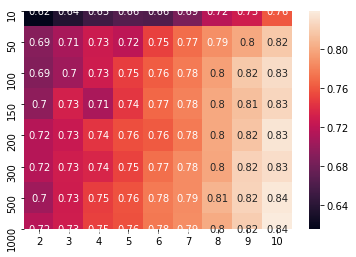

In [96]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

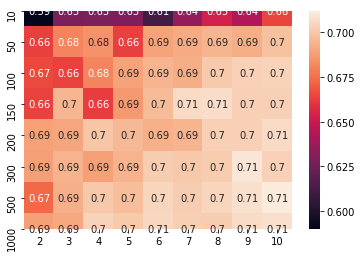

In [97]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [98]:
best_n_estimators = 150
best_max_depth = 7

In [99]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

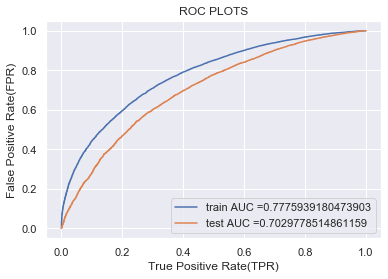

In [104]:
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_max_depth,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
rf.fit(X_tr,y_train)
y_train_pred = batch_predict(rf,X_tr)  
y_test_pred = batch_predict(rf,X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [105]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.49788237818881403 for threshold 0.499
the maximum value of tpr*(1-fpr) 0.4228364734985926 for threshold 0.503


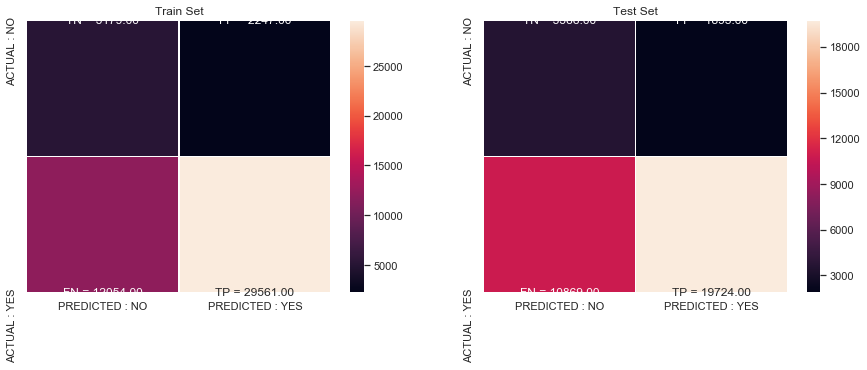

In [108]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
main_score_trdata = []
main_score_cvdata = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=j,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr2, y_train)
        y_train_pred=rf.predict_proba(X_tr2)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv2)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 8/8 [09:55<00:00, 74.47s/it] 


In [110]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=n_estimators, columns=max_depth)

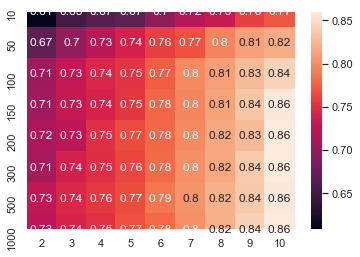

In [111]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

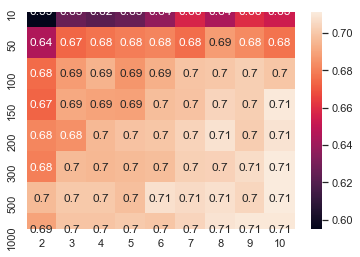

In [112]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [113]:
best_n_estimators = 200
best_max_depth = 8

In [114]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

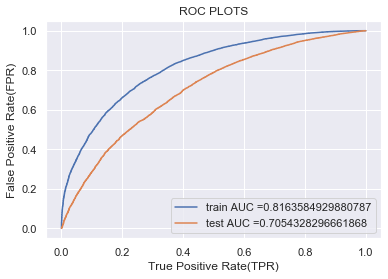

In [115]:
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_max_depth,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
rf.fit(X_tr2,y_train)
y_train_pred = batch_predict(rf,X_tr2)  
y_test_pred = batch_predict(rf,X_te2)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [116]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.5434473840478973 for threshold 0.506
the maximum value of tpr*(1-fpr) 0.4204988495495108 for threshold 0.509


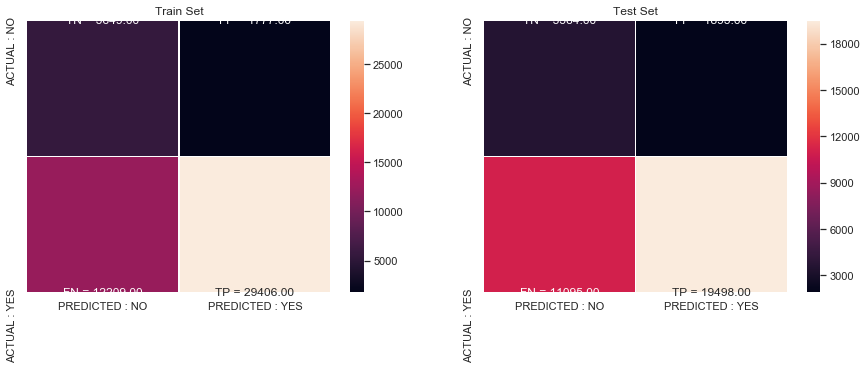

In [117]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### Applying Random Forests on AVG W2V

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
main_score_trdata = []
main_score_cvdata = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=j,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr3, y_train)
        y_train_pred=rf.predict_proba(X_tr3)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv3)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 8/8 [1:56:22<00:00, 872.86s/it] 


In [84]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=n_estimators, columns=max_depth)

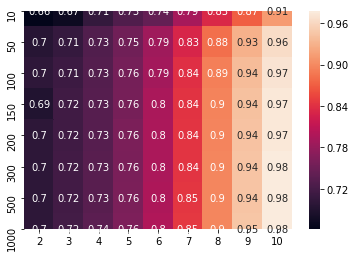

In [85]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

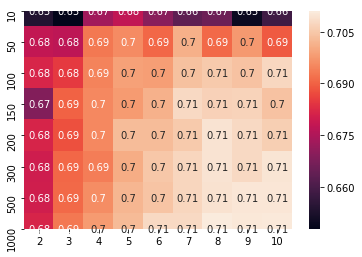

In [86]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [91]:
best_n_estimators = 150
best_max_depth = 7

In [92]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

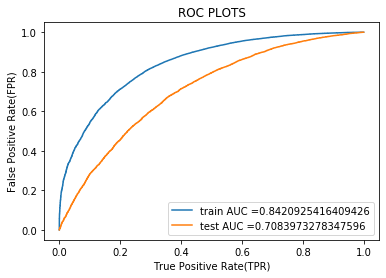

In [93]:
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_max_depth,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
rf.fit(X_tr3,y_train)
y_train_pred = batch_predict(rf,X_tr3)  
y_test_pred = batch_predict(rf,X_te3)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [94]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.5774650531647123 for threshold 0.52
the maximum value of tpr*(1-fpr) 0.432958948048146 for threshold 0.535


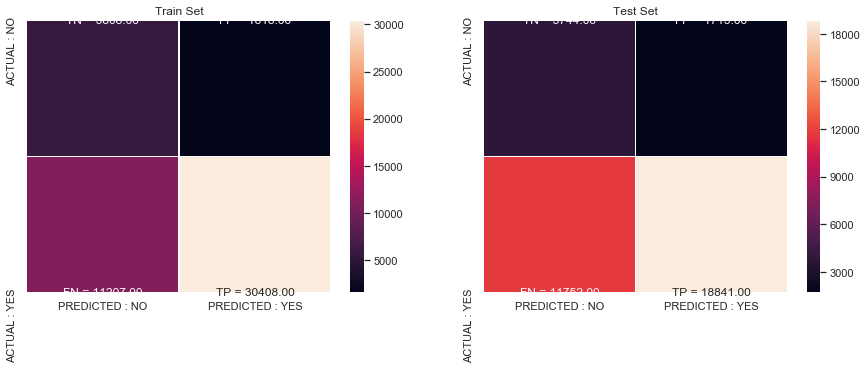

In [95]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
main_score_trdata4 = []
main_score_cvdata4 = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = RandomForestClassifier(n_estimators=i,criterion='gini',max_depth=j,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr4, y_train)
        y_train_pred=rf.predict_proba(X_tr4)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv4)[:, 1]     
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata4.append(train_auc)
    main_score_cvdata4.append(cv_auc)

100%|██████████| 8/8 [1:58:22<00:00, 887.84s/it] 


In [88]:
train_auc_df = pd.DataFrame(data=main_score_trdata4, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata4, index=n_estimators, columns=max_depth)

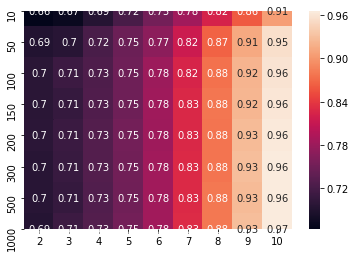

In [89]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

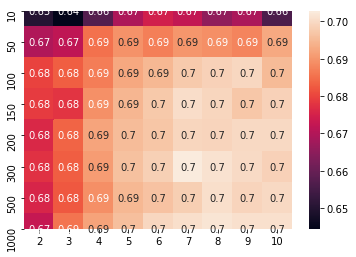

In [90]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [96]:
best_n_estimators = 200
best_max_depth = 5

In [97]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

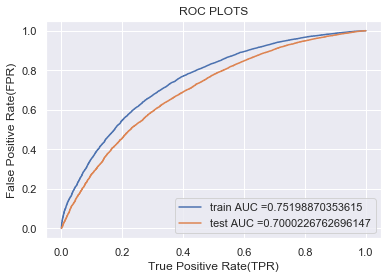

In [98]:
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier(n_estimators=best_n_estimators,criterion='gini',max_depth=best_max_depth,max_features='auto',bootstrap=True,n_jobs=-1,class_weight='balanced')
rf.fit(X_tr4,y_train)
y_train_pred = batch_predict(rf,X_tr4)  
y_test_pred = batch_predict(rf,X_te4)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.4731860181011743 for threshold 0.503
the maximum value of tpr*(1-fpr) 0.4202548600498253 for threshold 0.503


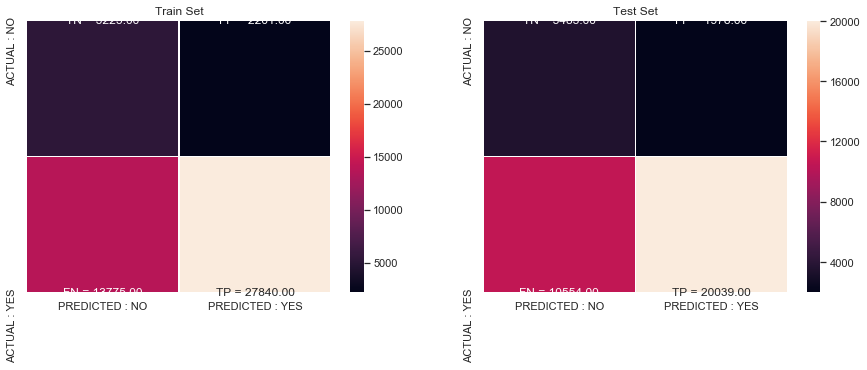

In [100]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
main_score_trdata = []
main_score_cvdata = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = XGBClassifier(n_estimators=i,max_depth=j,booster='gbtree',n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr, y_train)
        y_train_pred=rf.predict_proba(X_tr)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv)[:, 1]   
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 8/8 [1:04:30<00:00, 483.86s/it]


In [104]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=n_estimators, columns=max_depth)

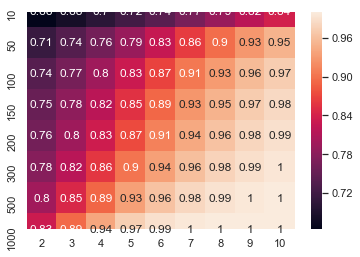

In [105]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

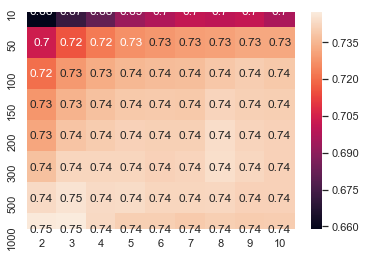

In [106]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [107]:
best_n_estimators = 150
best_max_depth = 5

In [108]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

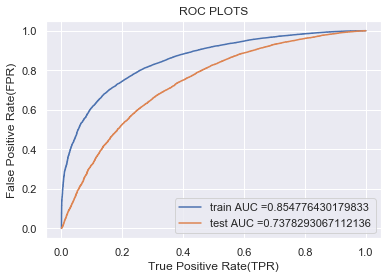

In [109]:
from sklearn.metrics import roc_curve, auc
rf = XGBClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,booster='gbtree',n_jobs=-1,class_weight='balanced')
rf.fit(X_tr, y_train)
y_train_pred = batch_predict(rf,X_tr)  
y_test_pred = batch_predict(rf,X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [110]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.5967965556039825 for threshold 0.828
the maximum value of tpr*(1-fpr) 0.46248596475072656 for threshold 0.846


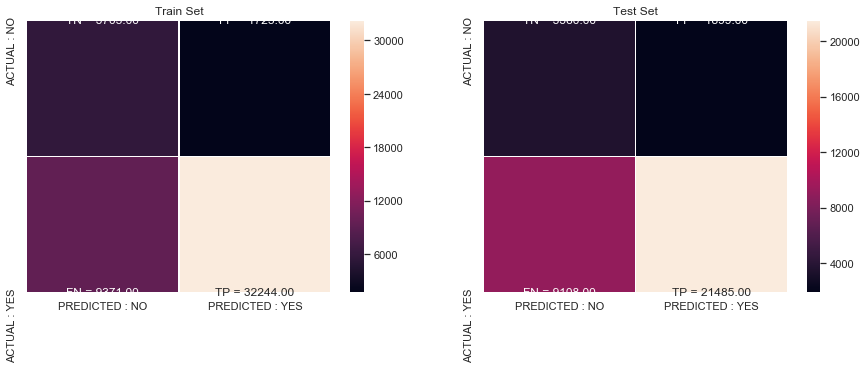

In [111]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [112]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
main_score_trdata = []
main_score_cvdata = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = XGBClassifier(n_estimators=i,max_depth=j,booster='gbtree',n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr2, y_train)
        y_train_pred=rf.predict_proba(X_tr2)[:, 1]
        y_cv_pred=rf.predict_proba(X_cv2)[:, 1]   
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata.append(train_auc)
    main_score_cvdata.append(cv_auc)

100%|██████████| 8/8 [2:37:22<00:00, 1180.35s/it]


In [113]:
train_auc_df = pd.DataFrame(data=main_score_trdata, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata, index=n_estimators, columns=max_depth)

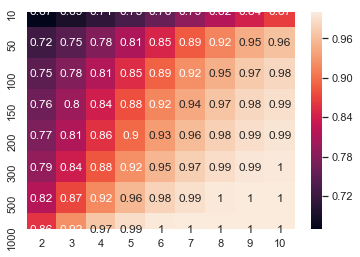

In [114]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

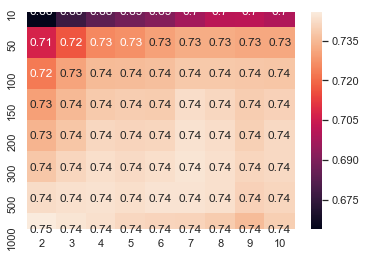

In [115]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [81]:
best_n_estimators = 100
best_max_depth = 4

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

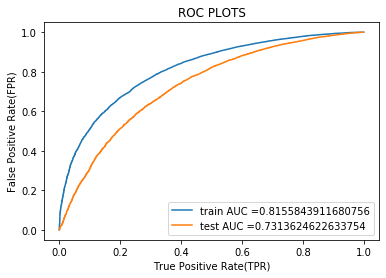

In [83]:
from sklearn.metrics import roc_curve, auc
rf = XGBClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,booster='gbtree',n_jobs=-1,class_weight='balanced')
rf.fit(X_tr2, y_train)
y_train_pred = batch_predict(rf,X_tr2)  
y_test_pred = batch_predict(rf,X_te2)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [84]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.5440248887343709 for threshold 0.85
the maximum value of tpr*(1-fpr) 0.45156989561173794 for threshold 0.853


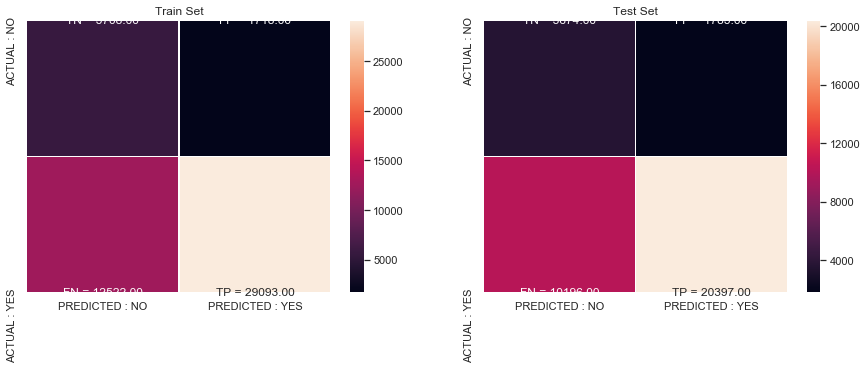

In [85]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [81]:
X_tr3

<49041x617 sparse matrix of type '<class 'numpy.float64'>'
	with 30237687 stored elements in Compressed Sparse Row format>

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
main_score_trdata3 = []
main_score_cvdata3 = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = XGBClassifier(n_estimators=i,max_depth=j,booster='gbtree',n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr3[:20000], y_train[:20000])
        y_train_pred=rf.predict_proba(X_tr3[:20000])[:, 1]
        y_cv_pred=rf.predict_proba(X_cv3)[:, 1]   
        train_auc.append(roc_auc_score(y_train[:20000],y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata3.append(train_auc)
    main_score_cvdata3.append(cv_auc)

100%|██████████| 8/8 [7:24:07<00:00, 3330.93s/it]  


In [83]:
train_auc_df = pd.DataFrame(data=main_score_trdata3, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata3, index=n_estimators, columns=max_depth)

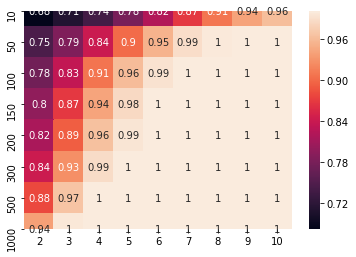

In [84]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

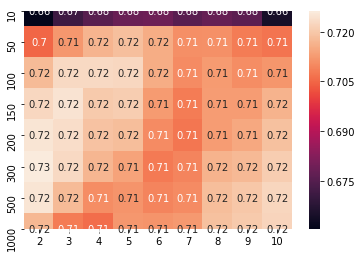

In [85]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [90]:
best_n_estimators = 150
best_max_depth = 4

In [91]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

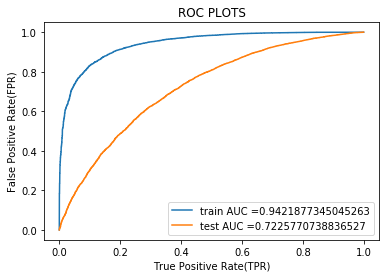

In [92]:
from sklearn.metrics import roc_curve, auc
rf = XGBClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,booster='gbtree',n_jobs=-1,class_weight='balanced')
rf.fit(X_tr3[:20000], y_train[:20000])
y_train_pred = batch_predict(rf,X_tr3[:20000])  
y_test_pred = batch_predict(rf,X_te3)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:20000], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [93]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.7506904164460885 for threshold 0.811
the maximum value of tpr*(1-fpr) 0.4413126963212667 for threshold 0.867


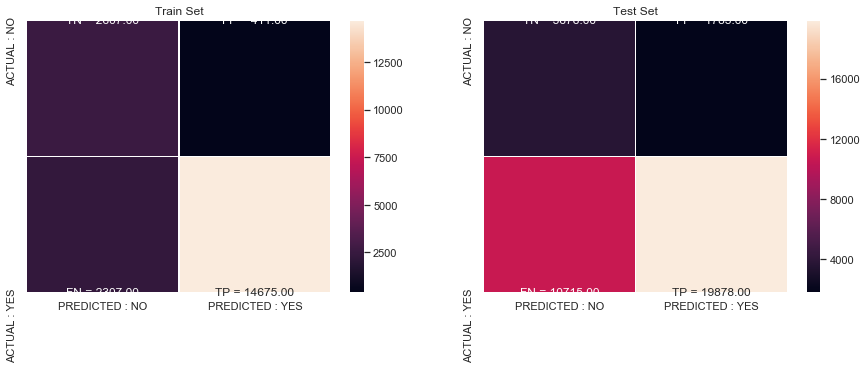

In [95]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train[:20000], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
main_score_trdata4 = []
main_score_cvdata4 = []
n_estimators = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(n_estimators):
    train_auc = []
    cv_auc = []
    for j in max_depth:
        rf = XGBClassifier(n_estimators=i,max_depth=j,booster='gbtree',n_jobs=-1,class_weight='balanced')
        rf.fit(X_tr4[:20000], y_train[:20000])
        y_train_pred=rf.predict_proba(X_tr4[:20000])[:, 1]
        y_cv_pred=rf.predict_proba(X_cv4)[:, 1]   
        train_auc.append(roc_auc_score(y_train[:20000],y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    main_score_trdata4.append(train_auc)
    main_score_cvdata4.append(cv_auc)

100%|██████████| 8/8 [7:13:47<00:00, 3253.38s/it]  


In [87]:
train_auc_df = pd.DataFrame(data=main_score_trdata4, index=n_estimators, columns=max_depth)
cv_auc_df = pd.DataFrame(data=main_score_cvdata4, index=n_estimators, columns=max_depth)

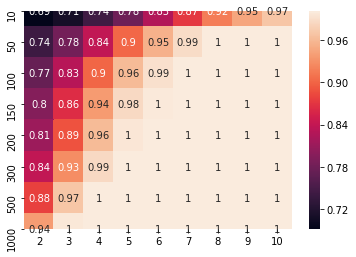

In [88]:
heat_train=sns.heatmap(data=train_auc_df,annot=True)
heat_train

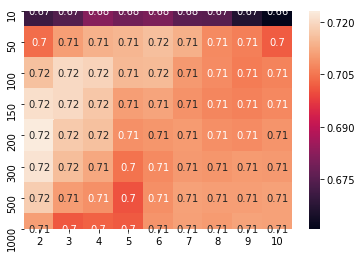

In [89]:
heat_cv=sns.heatmap(data=cv_auc_df,annot=True)
heat_cv

In [96]:
best_n_estimators = 150
best_max_depth = 3

In [97]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

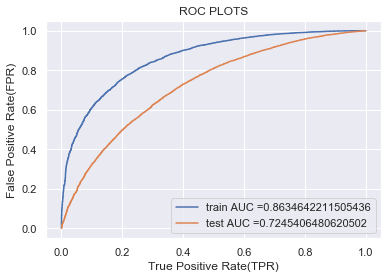

In [98]:
from sklearn.metrics import roc_curve, auc
rf = XGBClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,booster='gbtree',n_jobs=-1,class_weight='balanced')
rf.fit(X_tr4[:20000], y_train[:20000])
y_train_pred = batch_predict(rf,X_tr4[:20000])  
y_test_pred = batch_predict(rf,X_te4)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:20000], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()
print("="*100)

## Confusion Matrix :

In [99]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.6071837338548695 for threshold 0.824
the maximum value of tpr*(1-fpr) 0.44193496894238443 for threshold 0.865


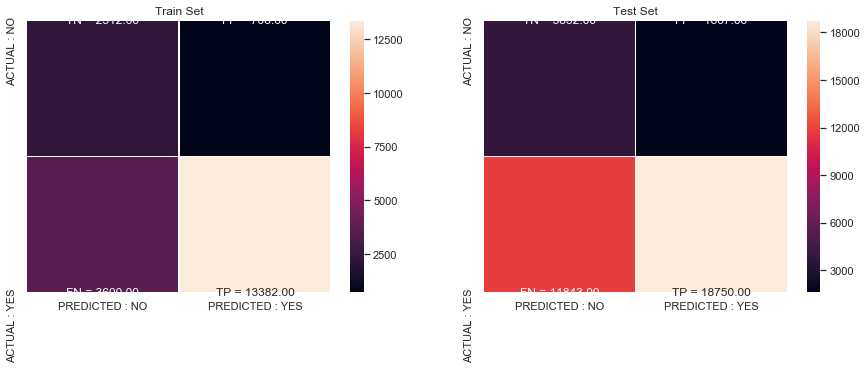

In [100]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train[:20000], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Conclusion</h1>

In [102]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["BOW","RF",0.702])
x.add_row(["TFIDF","RF",0.705])
x.add_row(["AVG W2V","RF",0.708])
x.add_row(["TFIDF W2V","RF",0.700])
x.add_row(["BOW","XGBOOST",0.737])
x.add_row(["TFIDF","XGBOOST",0.731])
x.add_row(["AVG W2V","XGBOOST",0.722])
x.add_row(["TFIDF W2V","XGBOOST",0.724])
print(x)

+------------+---------+-------+
| Vectorizer |  Model  |  AUC  |
+------------+---------+-------+
|    BOW     |    RF   | 0.702 |
|   TFIDF    |    RF   | 0.705 |
|  AVG W2V   |    RF   | 0.708 |
| TFIDF W2V  |    RF   |  0.7  |
|    BOW     | XGBOOST | 0.737 |
|   TFIDF    | XGBOOST | 0.731 |
|  AVG W2V   | XGBOOST | 0.722 |
| TFIDF W2V  | XGBOOST | 0.724 |
+------------+---------+-------+
